In [ ]:
# 1. 라이브러리 임포트

In [54]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D


In [46]:
# 2. 모델 생성 ( Sequential ~ compile까지만 실행 )

In [55]:
model=Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(244, 244, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(12, activation='softmax'))

In [56]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [57]:
model_dir = "./model"
model_path = model_dir + "/notes_classify.model"

In [59]:
# checkpoint = ModelCheckpoint(filepath = model_path,
#                              monitor = 'val_loss',
#                             verbose = 1,
#                             save_best_only = True)
# early_stopping = EarlyStopping(monitor = 'val_loss', patience = 6)

In [ ]:
# 3. ImageDataGenerator를 통한 트레이닝,테스트 데이터 만들기
# - 디렉토리 지정을 통한 데이터 증식
# - fit으로 훈련 시키기

In [60]:
train_gen = ImageDataGenerator(rescale = 1./255,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True)

In [61]:
test_gen = ImageDataGenerator(rescale=1./255)

In [62]:
train_flow_gen = train_gen.flow_from_directory(directory="C:/Users/user/Desktop/bills/train",
                                              target_size=(244,244),
                                              class_mode='categorical',
                                              batch_size=32,
                                              shuffle=True)

Found 372 images belonging to 12 classes.


In [63]:
test_flow_gen = test_gen.flow_from_directory(directory="C:/Users/user/Desktop/bills/test",
                                            target_size=(244,244),
                                            class_mode='categorical',
                                            batch_size=32,
                                            shuffle=False)

Found 95 images belonging to 12 classes.


In [68]:
train_hist = model.fit(train_flow_gen, 
                       epochs = 20,
                       validation_data = test_flow_gen,
                       validation_steps = 10)

# steps_per_epochs 한 번 epoch를 돌 때, 데이터를 몇 번 볼 것인가. 트레이닝 데이터 수 / 배치사이즈
# validation_steops : 한 번 epoch를 돌고난 후, validation set을 통해 validation accuracy를 측정할 때, validation set을 몇 번 볼 것인지. validation data 수 / 배치사이즈


Epoch 1/20
12/12 [==============================] - ETA: 0s - loss: 2.4520 - accuracy: 0.1586WARNING:tensorflow:Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches (in this case, 10 batches). You may need to use the repeat() function when building your dataset.


12/12 [==============================] - 112s 9s/step - loss: 2.4520 - accuracy: 0.1586 - val_loss: 2.4234 - val_accuracy: 0.1053
Epoch 2/20
 5/12 [===========>..................] - ETA: 44s - loss: 2.3645 - accuracy: 0.1959

KeyboardInterrupt: 

In [42]:
test_hist = model.evaluate(test_flow_gen)

3/3 [==============================] - 14s 5s/step - loss: 2.5603 - accuracy: 0.2000


In [ ]:
# 4.  테스트 셋 예측하기

In [36]:
output = model.predict_generator(test_flow_gen, steps = 5)
print(test_flow_gen.class_indices)
print(output)

C:\Users\user\AppData\Local\Temp\ipykernel_16856\3935234878.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  output = model.predict_generator(test_flow_gen, steps = 5)


{'10000krw': 0, '1000jpy': 1, '1000krw': 2, '1000twd': 3, '1000vnd': 4, '10eur': 5, '20thb': 6, '2usd': 7, '5000jpy': 8, '5000krw': 9, '500vnd': 10, '50euro': 11}
[[0.07825298 0.07826014 0.09470929 ... 0.0980825  0.11467324 0.07834156]
 [0.07699125 0.07952548 0.10337717 ... 0.09856534 0.11954435 0.08591052]
 [0.07202283 0.07468256 0.06459332 ... 0.07883266 0.07285964 0.09206512]
 ...
 [0.06884149 0.09541259 0.06196269 ... 0.09119502 0.08166099 0.11811799]
 [0.06685114 0.08727297 0.09753606 ... 0.10179111 0.10136512 0.08846283]
 [0.07099307 0.08994503 0.08604939 ... 0.09376285 0.10100619 0.08339675]]


In [38]:
print(train_hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


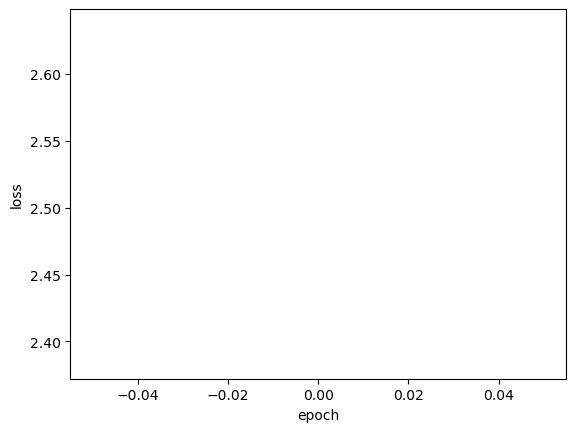

In [39]:
import matplotlib.pyplot as plt
plt.plot(train_hist.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

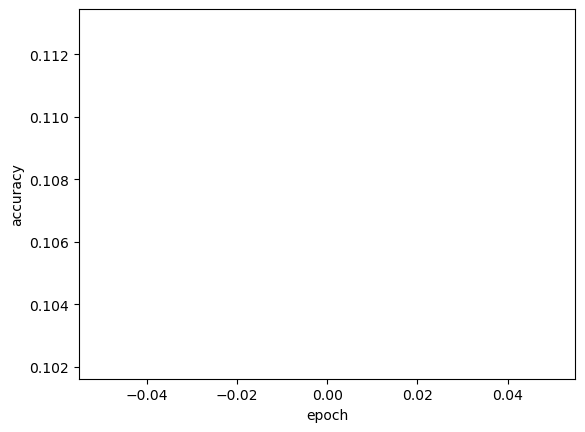

In [40]:

plt.plot(train_hist.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [ ]:
plt.plot(train_hist.history['loss'])
plt.plot(train_hist.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()